


## Thesis 
 This project aims to perform a comprehensive analysis to the *'salaries of Data Scientist'* dataset by conducting a regression analysis to estimate the best coefficients that capture the underlying relationships.

------------------------------------------------------------------------

# 1. Discovery:

The choosen datasest : https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Dataset Descreption: 
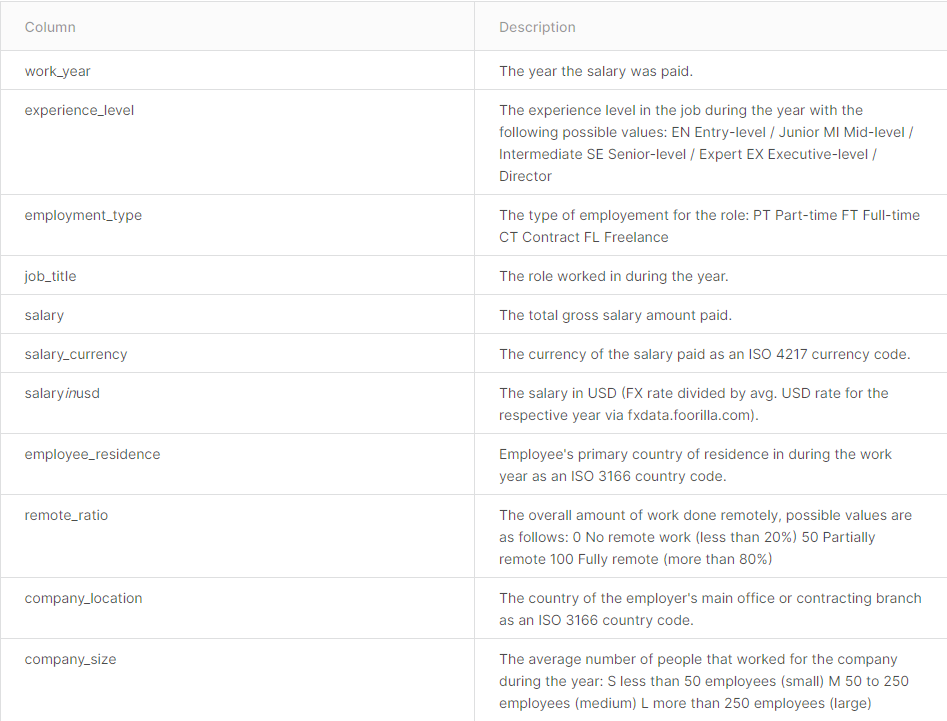


---------------------------------------------------------------------------------------------------------------------------

# 2. Data Preparation:


## a)

In [43]:
import pandas               as pd
import matplotlib.pyplot    as plt 
import seaborn              as sns
import numpy                as np
# * Read the file. Before continue. 
df = pd.read_csv("ds_salaries.csv")
display(df.head())
display(df.info())



print(f"""  
Field                 |          Type
----------------------|-----------------------
work_year             |          Catagorical
exprience_level       |          Ordinal
employment_type       |          Catagorical
job_title             |          Catagorical
salary                |          Numerical
salary_in_usd         |          Numerical
employee_residence    |          Catagorical
remote_ratio          |          Nominal
company_location      |          Catagorical
company_size          |          Ordinal
      """)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

  
Field                 |          Type
----------------------|-----------------------
work_year             |          Catagorical
exprience_level       |          Ordinal
employment_type       |          Catagorical
job_title             |          Catagorical
salary                |          Numerical
salary_in_usd         |          Numerical
employee_residence    |          Catagorical
remote_ratio          |          Nominal
company_location      |          Catagorical
company_size          |          Ordinal
      


## b)


In [44]:
print(f"""
From the prevoies observation, we have an additional column (Unnamed) we remove it, and the (work_year) should be of the categorical type.
Also, the (remote_ration) should be of nominal type. Hence, 
apply label encoding. Additinally, we noticed some outliers in the (salary_in_usd) so we aimed to remove them
Otherwise, there is no inconsistencies.""")

# * Drop (Unneeded) column.
df.drop(columns=['Unnamed: 0'], inplace=True)

# * Convert the year to cat type
# df['work_year'] = df['work_year'].apply(lambda x: str(-x) + '.')
df['work_year'] = df['work_year'].apply(lambda x: str(x))

# * Apply label encoding on the remote_ration column 
df['remote_ratio'] = df['remote_ratio'].map(
      {
            0:0,
            50:1,
            100:2
      }
)

#remove the outliers in the 'salary_in_usd'
Q3, Q1= np.percentile(df.loc[:, 'salary_in_usd'],q=[75,25] )
IQR = Q3 - Q1 
max = Q3 + (1.5*IQR)
outLitersIndeces = df['salary_in_usd'] > max
len(df.loc[outLitersIndeces, :].index) #we get 10 outliers

# * Drop the outliers recored
df.drop(df[outLitersIndeces].index, inplace=True)


display(df.sample(5)) 
display(df.info())

#Checking for any null values
display(df.isnull().sum())


From the prevoies observation, we have an additional column (Unnamed) we remove it, and the (work_year) should be of the categorical type.
Also, the (remote_ration) should be of nominal type. Hence, 
apply label encoding. Additinally, we noticed some outliers in the (salary_in_usd) so we aimed to remove them
Otherwise, there is no inconsistencies.


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
547,2022,SE,FT,Data Engineer,130000,USD,130000,US,2,US,M
394,2022,SE,FT,Data Analytics Manager,145000,USD,145000,US,2,US,M
409,2022,SE,FT,Data Scientist,180000,USD,180000,US,2,US,M
263,2021,SE,FT,Machine Learning Engineer,4900000,INR,66265,IN,0,IN,L
94,2021,EN,FT,Data Scientist,2200000,INR,29751,IN,1,IN,L


<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           597 non-null    object
 1   experience_level    597 non-null    object
 2   employment_type     597 non-null    object
 3   job_title           597 non-null    object
 4   salary              597 non-null    int64 
 5   salary_currency     597 non-null    object
 6   salary_in_usd       597 non-null    int64 
 7   employee_residence  597 non-null    object
 8   remote_ratio        597 non-null    int64 
 9   company_location    597 non-null    object
 10  company_size        597 non-null    object
dtypes: int64(3), object(8)
memory usage: 56.0+ KB


None

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

------------------------------------------------------------------------

# 3. Model Planning:


## a)

In [45]:
# ** i. 

#the needed statistical summaries.
display(df.describe(exclude='object').T)
display(df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
salary,597.0,322417.149079,1.557181e+06,4000.0,69999.0,112900.0,160000.0,30400000.0
salary_in_usd,597.0,107168.855946,5.855552e+04,2859.0,62649.0,100000.0,148261.0,276000.0
remote_ratio,597.0,1.413735,8.159560e-01,0.0,1.0,2.0,2.0,2.0


,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,597,597,597,597,597,597,597,597
unique,3,4,4,49,17,57,50,3
top,2022,SE,FT,Data Scientist,USD,US,US,M
freq,315,277,579,142,388,322,345,324


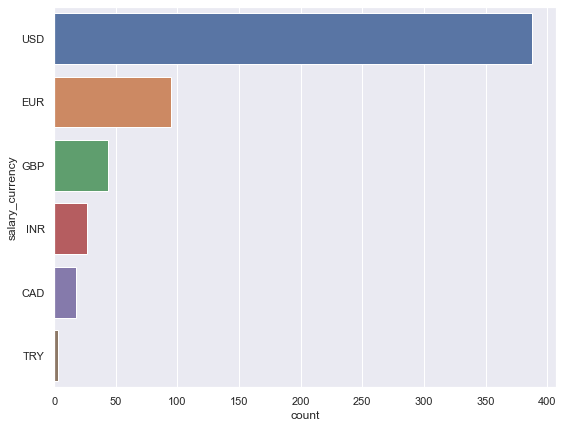

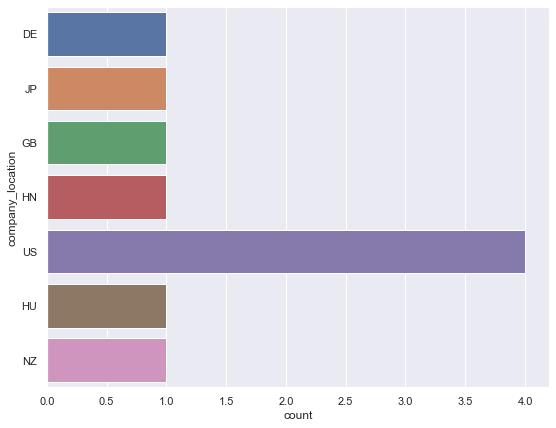

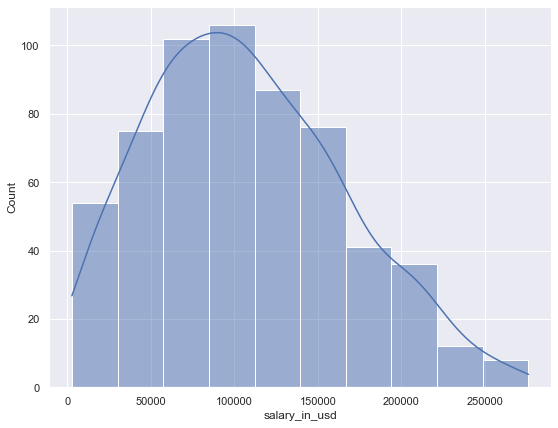

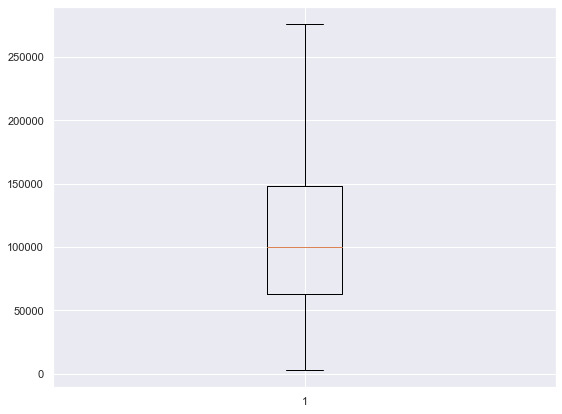

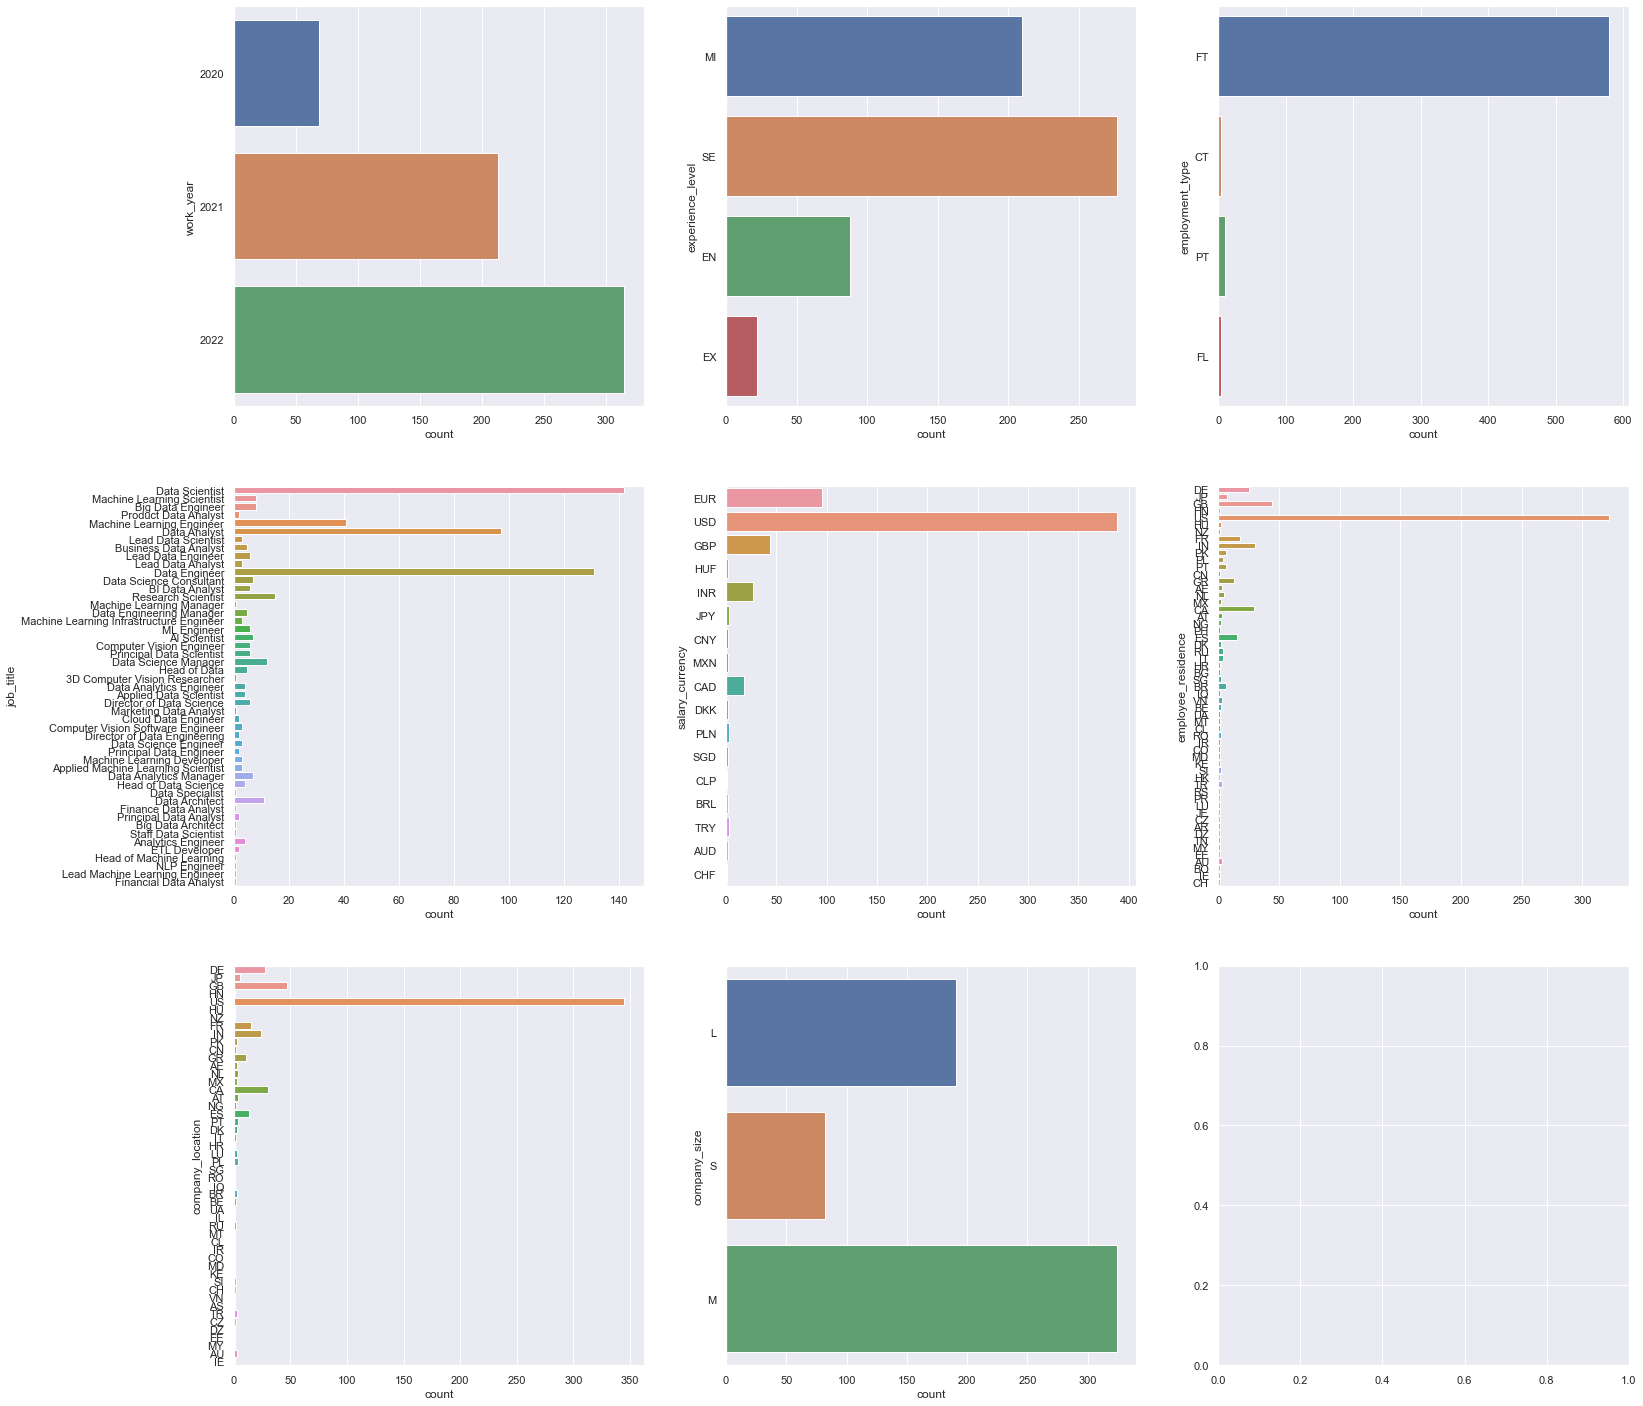

In [46]:
#** ii.univariate graphs
sns.countplot(y=df['salary_currency'],order=df['salary_currency'].value_counts().head(6).index)
plt.figure()
sns.countplot(y=df['company_location'].head(10),data=df) # ** <=> plot the bars on the x, y axis are the same. 
plt.show()
    
sns.histplot(x=df['salary_in_usd'],bins=10,kde=True,data=df)

plt.figure()
plt.boxplot(df['salary_in_usd'])
plt.show()

cat_columns = df.select_dtypes(include='object').columns
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 
## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

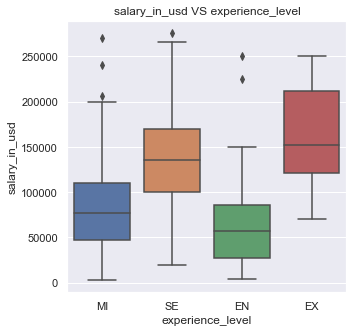

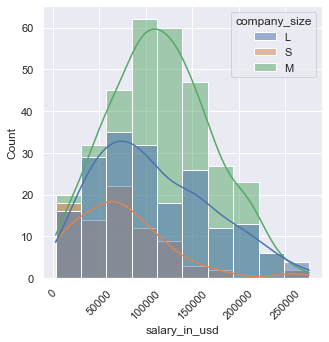

<Figure size 432x288 with 0 Axes>

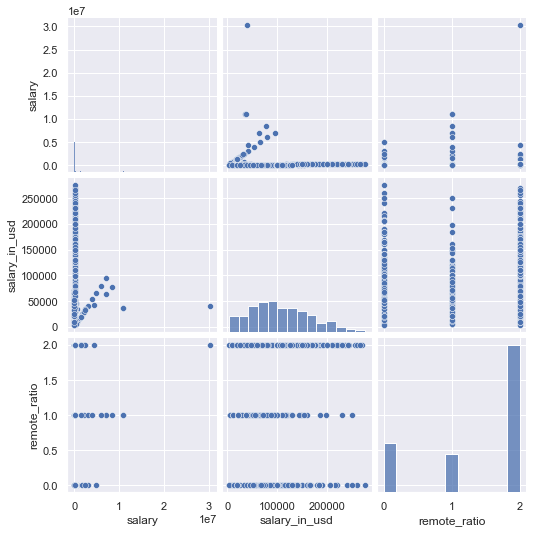

In [47]:
# ** iii.bivariate plots
plt.figure(figsize=(5,5))
sns.boxplot(y='salary_in_usd', x='experience_level', data=df)
plt.title("salary_in_usd VS experience_level")
plt.show()
# 
plt.figure(figsize=(5,5))
sns.histplot(x='salary_in_usd',bins=10,hue='company_size',kde=True,data=df)
plt.xticks(rotation=45)
plt.show()
#

#
num_columns = df.select_dtypes(exclude='object').columns 
df1 = df[num_columns]
import seaborn as sns 
plt.figure()
sns.pairplot(df1)
plt.show()

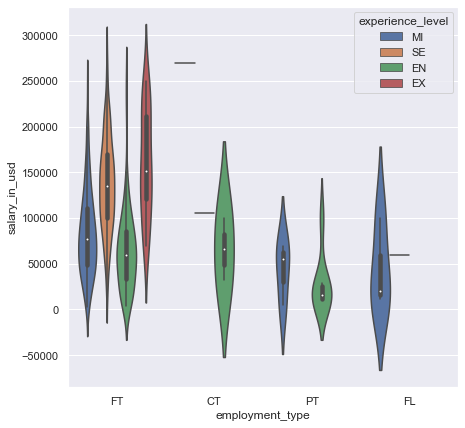

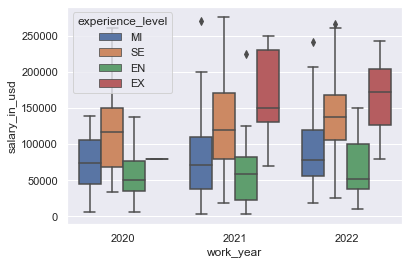

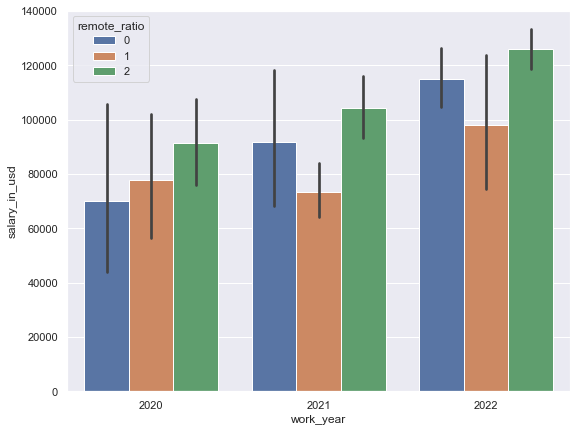

<Figure size 648x504 with 0 Axes>

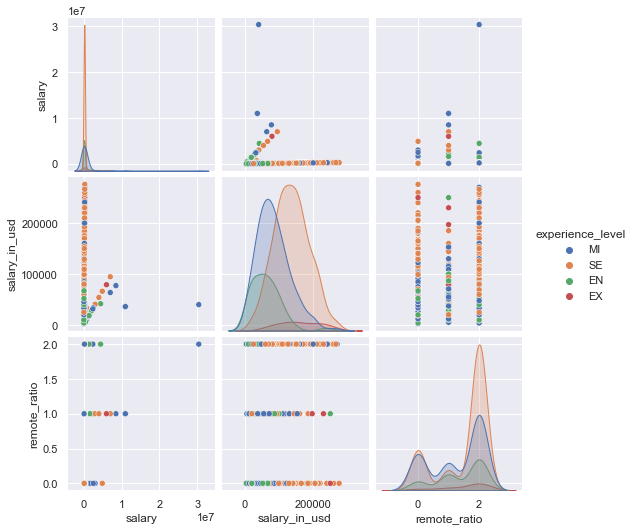

In [48]:
# ** iv. Advanced graphs

plt.figure(figsize=(7,7))
sns.violinplot(x='employment_type', y="salary_in_usd", hue='experience_level', data=df)
plt.figure()
#
sns.boxplot(y='salary_in_usd',x='work_year',hue='experience_level',data=df)
plt.show()
#
sns.set(rc={'figure.figsize':(9,7)})
sns.barplot(data=df,x='work_year',y='salary_in_usd',hue='remote_ratio')
plt.show()

num_columns = df.select_dtypes(exclude='object').columns
plt.figure()
sns.pairplot(vars=num_columns,hue ='experience_level',data=df)   # look for {x, y}_vars kwargs
plt.show()


,experience_level,salary,salary_in_usd,remote_ratio
experience_level,1.000000,-0.028787,0.524220,0.086006
salary,-0.028787,1.000000,-0.108945,-0.014967
salary_in_usd,0.524220,-0.108945,1.000000,0.134026
remote_ratio,0.086006,-0.014967,0.134026,1.000000


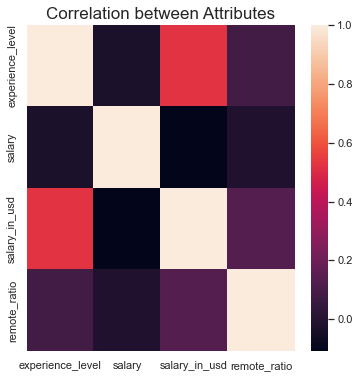


There is some correlation between the 'experience_level' and 'salary_in_usd'
(strength, r approx. = 0.5), 
and the two variables are positively related (direction, r > 0).
      
The top three correlated input variables are:  ['experience_level', 'remote_ratio', 'salary']


In [49]:
# ** v.

#we use encoder for 'experience_level' to compute the correlation
df['experience_level'] = df['experience_level'].map({
    'EN':1,
    'MI':2,
    'SE':3,
    'EX':4
})


corr = df.corr(method = 'pearson') #method 1 
display(corr)

# * Identify the numerical columns, return a df. Use for correlation. 
numCol = df.select_dtypes(exclude='object')
# * Correlation
corr = df.corr()
# * Heat map. #method 2
plt.figure(figsize=(6,6))
sns.heatmap(corr)
plt.title("Correlation between Attributes", fontsize =17)
plt.show()

print(f"""
There is some correlation between the 'experience_level' and 'salary_in_usd'
(strength, r approx. = 0.5), 
and the two variables are positively related (direction, r > 0).
      """)

corr=corr.apply(lambda x: np.abs(x))
sorted_corr = corr.sort_values(by=['salary_in_usd'], ascending=False) # negative values will be considered using abs.
sorted_corr = sorted_corr['salary_in_usd'].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())

## b) 

After plotting the required plots above for all featurs, we found the following:

 >- Most of the data scintest are Intermediate (Senior-level), whearas there is low number of Experts.
- Most of the data scintest from the USA. 
- The most used currency is US Dollars and least used is Japanese Yen.
- The highest salaries can be found in big companies.
- The more experience of data scintest, the more salary would be gained.

As we noticed that we get one numerical output (*salary_in_usd*) and multiable inputs, we decided to perform '**Regression Analysis**'

------------------------------------------------------------------------

# 4. Model Building: 

## Linear Regression
#### Hypothesis:
Our underlying hypothesis is that the input variables are linearly related with the output variable.

## a)

In [50]:
# we think there are many values in the 'job_title' column 
#that don't need to be Unique, so WE are merging them together.

ndf=df
ndf['job_title'] = ndf['job_title'].map({'Machine Learning Scientist': 'Data Scientist',
                 'Product Data Analyst': 'Data Analyst',
                 'Lead Data Scientist': 'Data Scientist',
                 'Business Data Analyst': 'Data Analyst',
                 'Lead Data Analyst': 'Data Analyst',
                 'Data Science Consultant': 'Data Scientist',
                 'BI Data Analyst': 'Data Analyst',
                 'Director of Data Science': 'Data Scientist',
                 'Research Scientist': 'Data Scientist',
                 'Machine Learning Manager': 'Data Scientist',
                 'AI Scientist': 'Data Scientist',
                 'Principal Data Scientist': 'Data Scientist',
                 'Data Science Manager': 'Data Scientist',
                 'Head of Data': 'Data Scientist',
                 'Applied Data Scientist': 'Data Scientist',
                 'Marketing Data Analyst': 'Data Analyst',
                 'Financial Data Analyst': 'Data Analyst',
                 'Machine Learning Developer': 'Data Scientist',
                 'Applied Machine Learning Scientist': 'Data Scientist',
                 'Data Analytics Manager': 'Data Analyst',
                 'Head of Data Science': 'Data Scientist',
                 'Data Specialist': 'Data Scientist',
                 'Data Architect': 'Data Engineer',
                 'Principal Data Analyst': 'Data Analyst',
                 'Staff Data Scientist': 'Data Scientist',
                 'Big Data Architect': 'Data Engineer',
                 'Analytics Engineer': 'Data Engineer',
                 'ETL Developer': 'Data Engineer',
                 'Head of Machine Learning': 'Data Engineer',
                 'NLP Engineer': 'Data Engineer',
                 'Lead Machine Learning Engineer': 'Data Engineer',
                 'Data Analytics Lead': 'Data Analyst',
                 'Big Data Engineer': 'Data Engineer',
                 'Machine Learning Engineer': 'Data Engineer',
                 'Lead Data Engineer': 'Data Engineer',
                 'Machine Learning Infrastructure Engineer': 'Data Engineer',
                 'ML Engineer': 'Data Engineer',
                 'Computer Vision Engineer': 'Data Engineer',
                 'Data Analytics Engineer': 'Data Engineer',
                 'Cloud Data Engineer': 'Data Engineer',
                 'Computer Vision Software Engineer': 'Data Engineer',
                 'Director of Data Engineering': 'Data Engineer',
                 'Data Science Engineer': 'Data Engineer',
                 'Principal Data Engineer': 'Data Engineer',
                 '3D Computer Vision Researcher': 'Data Scientist',
                 'Data Engineering Manager': 'Data Engineer',
                 'Finance Data Analyst': 'Data Analyst',
                'Data Analyst' : 'Data Analyst', 
                'Data Engineer':'Data Engineer',
                'Data Scientist':'Data Scientist'})
#df

In [51]:
# for better understanding of the relationships
display(pd.pivot_table(ndf, index=['work_year', 'experience_level', 'job_title'],aggfunc={'salary_in_usd':np.mean}))

salary_in_usd
work_year experience_level job_title                    
2020      1                Data Analyst     55814.400000
                           Data Engineer    95066.166667
                           Data Scientist   47055.888889
          2                Data Analyst     60728.875000
                           Data Engineer    81275.500000
                           Data Scientist   77062.769231
          3                Data Engineer    97011.000000
                           Data Scientist  148153.750000
          4                Data Engineer    79833.000000
2021      1                Data Analyst     52536.666667
                           Data Engineer    49864.266667
                           Data Scientist   67693.652174
          2                Data Analyst     74238.700000
                           Data Engineer    82978.075000
                           Data Scientist   72621.000000
          3                Data Analyst    116924.272727
                           Data Engineer   133248.193548
                           Data Scientist  122899.111111
          4                Data Analyst    150000.000000
                           Data Scientist  161910.000000
2022      1                Data Analyst     73000.000000
                           Data Engineer    64134.181818
                           Data Scientist   64202.285714
          2                Data Analyst     68970.590909
                           Data Engineer    86764.685714
                           Data Scientist  110133.323529
          3                Data Analyst    113669.351852
                           Data Engineer   145900.833333
                           Data Scientist  157694.338983
          4                Data Analyst    120000.000000
                           Data Engineer   166460.857143
                           Data Scientist  196284.666667

In [52]:
#As we have a significant number of data scintests in US (322 out 597 more than the half!) and most currency of the salaries is USD (388 out 597) , we replace 'company_location' to 'company_location_fact' and change 'employee_residence'
# so that refer if the location inside US or outside it

def not_usa(x):
    if x!='US':
        return "not_USA"
    else:
        return "USA"
    
ndf['company_location_fact'] = ndf['company_location'].apply(not_usa)
ndf['employee_residence'] = ndf['employee_residence'].apply(not_usa)

ndf = ndf.drop("company_location", axis=1)
ndf.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,company_location_fact
0,2020,2,FT,Data Scientist,70000,EUR,79833,not_USA,0,L,not_USA
1,2020,3,FT,Data Scientist,260000,USD,260000,not_USA,0,S,not_USA
2,2020,3,FT,Data Engineer,85000,GBP,109024,not_USA,1,M,not_USA
3,2020,2,FT,Data Analyst,20000,USD,20000,not_USA,0,S,not_USA
4,2020,3,FT,Data Engineer,150000,USD,150000,USA,1,L,USA


In [53]:
# as the 'salary' are varies with respect to its 'currency', so it is preffered to drop them and using 'salary_in_usd' only to unify the data
ndf = ndf.drop("salary", axis=1)
ndf = ndf.drop("salary_currency", axis=1)
ndf.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,company_location_fact
0,2020,2,FT,Data Scientist,79833,not_USA,0,L,not_USA
1,2020,3,FT,Data Scientist,260000,not_USA,0,S,not_USA
2,2020,3,FT,Data Engineer,109024,not_USA,1,M,not_USA
3,2020,2,FT,Data Analyst,20000,not_USA,0,S,not_USA
4,2020,3,FT,Data Engineer,150000,USA,1,L,USA


In [54]:
# handeling Nominal data
ndf = pd.get_dummies(ndf,columns=['employee_residence','company_location_fact','work_year'],drop_first=True)

ndf['company_size'] = ndf['company_size'].map({
    'L':1,
    'M':2,
    'S':3})

ndf['job_title'] = ndf['job_title'].map({
    'Data Scientist':1,
    'Data Engineer':2,
    'Data Analyst':3})

ndf['employment_type'] = ndf['employment_type'].map({
    'FT':1,
    'PT':2,
    'CT':3,
    'FL':4})

#put the output in last column
df1 = ndf.pop('salary_in_usd') # remove column b and store it in df1
ndf['salary_in_usd']=df1 # add b series as a 'new' column


ndf.head()

,experience_level,employment_type,job_title,remote_ratio,company_size,employee_residence_not_USA,company_location_fact_not_USA,work_year_2021,work_year_2022,salary_in_usd
0,2,1,1,0,1,1,1,0,0,79833
1,3,1,1,0,3,1,1,0,0,260000
2,3,1,2,1,2,1,1,0,0,109024
3,2,1,3,0,3,1,1,0,0,20000
4,3,1,2,1,1,0,0,0,0,150000


In [55]:
# Generate "Train - Test" splits
from sklearn.model_selection import train_test_split
X = ndf.drop('salary_in_usd', axis=1) # independent variables
y = ndf[['salary_in_usd']] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Scaling the Train - Test splits
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# * Fit on the train set. 
scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

## b)

In [56]:
# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV #CV because alpha is not given
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

The MSE using OLS is: 0.446823296449591
The MSE using Ridge is: 0.4450174427768049
The MSE using Lasso is: 0.4407458784450137


## c)

In [57]:
display(ndf.sample(6)) #seek of referncing for the below

#Find the coefficient estimates using Lasso regression (lowest MSE) 
best_beta =  np.round(reg3.coef_,2)
best_beta_0 = np.round(reg3.intercept_,2)
print(f'\nThe best values for the estimates are :', best_beta_0, best_beta.tolist())
print('\nDetails of the best estimates:')
print('The best penalty coefficient is:', reg3.alpha_)
print('The best coefficient estimates are:', reg3.coef_.tolist())

,experience_level,employment_type,job_title,remote_ratio,company_size,employee_residence_not_USA,company_location_fact_not_USA,work_year_2021,work_year_2022,salary_in_usd
103,2,1,3,0,1,0,0,1,0,62000
271,3,1,2,0,2,1,1,1,0,18907
550,3,1,1,0,1,0,0,0,1,205300
505,1,1,1,1,2,1,1,0,1,86703
255,3,1,2,1,2,1,1,1,0,99703
296,3,1,3,2,2,0,0,0,1,102100



The best values for the estimates are : 0.0 [0.32, -0.06, -0.19, 0.06, -0.05, -0.49, -0.01, -0.06, 0.0]

Details of the best estimates:
The best penalty coefficient is: 0.01
The best coefficient estimates are: [0.31508989185094366, -0.060578307973369806, -0.19286156933395693, 0.06244382734730816, -0.05264741700582779, -0.4890136153071274, -0.009908083948920345, -0.059644314490131904, 0.0]


### Interpreting the above:

>- Lassso performs better than OLS and Ridge for this data with Mean Squared Error of 44.07% .
- Lasso does feature selection, so it is useful when there are unrelated input columns.
- There were 597 samples/observations in total.
- From the regression analysis, we can say that input variable **work_year** seems to have almost NO relationship with **salary_in_usd**. 
- More information about **experience_level*, employment_type, *job_title*, *employee_residence* and *company_size** and using the above Lasso _reg3_ model, one can predict the **salary_in_usd**.



----------------------------------------------------------------------------

# 5. Operationalize:

## a) 

This analytics is believed to be a useful tool for many companies' employers. As data scintests are reqiured for almost all institutes, using this dataset analysis can be used to set an approximation for salaries of the data scincetests with respect to diffrent aspects.
Emplyers should follow the next process for seccessful use of the methodology:

- Specify the needed possition from the following:
>+ Data Scientist
>+ Data Analyst
>+ Data Engineer

- Identify the approprate experience level that would be enough to maintain the duties of the job.

- Set the desirable overall amount of work done remotely by the worker.

- State the location of the company and its size (number of people that work there).

- Provide a clear state of the employee's residence if it is inside/outside the USA.

- Using LASSO regression model with the previuse information to predict the expected salary of this new worker.

***Note***: The lowest Mean Squer Error for the Lasso regression model was 44.07%, so this dataset may not be the ideal reference for data scincetests' salaries prediction.


## b) 

We faced number of challanges in order to compute regression model for this dataset, which are the following:

- Firstly, the 'job_title' column was filled with 50 catagories, so we merged them together and reclassify them to three main groups (Data Scientist, Data Analyst, Data Engineer) in order to apply label-encoder effectivly.

- As we had more than the half of the total data scintests in US (322 out 597) and most currency of the salaries is USD (388 out 597), we replaced 'company_location' to 'company_location_fact' and change 'employee_residence' so that refer if the location inside US or outside it in order to apply Hot-encoder effectivly. 

- Because the 'salary' column varies with respect to its 'currency', so it is preffered to drop them and using 'salary_in_usd' only as dependent column to unify the dataset.

---------------------------------------------------------------------------

# 6. Communicate Results:

## a)

   In conclusion, we examined the dataset of data scientist salaries. We imported Libraries and readed "Data Science Job Salary" Dataset. We checked the outliers values  First step to do in analyzing tha data is to clean the data, so we started cleaning the data by using various technique. Binary Encoding and One-Hot-Encoding was implemented for categorical variables. After that we try to understand the data and find realationships between the columns by many tecniques, some of them :
   - plotting the columns in different forms.
   - using count tables such as pivot table. 
   - find the correlatio between two column such a coreelation is Peraon's correlation.

After understanding and prepering the data we have found that the best model to build is **linear Regression model** since we have one *numerical* output column, based on that we build the model using penalized linear regression methods in order to overcome the overfitting phonemone. After interpreting the above, Lasso Regression analysis model performs better then Ordinary Least Squeere and Ridge with mean squered error of **44.07 %**. However, the previuse Mean Squer Error for the Lasso regression model indicates that it may have some sorts of errors, so this dataset may not be the *ideal* reference for data scincetests' salaries prediction, but our methodology can be used effictivlly in finding an expected salaries based on the giudlines above.

We can sum up the information from this dataset in the next main points :
>- The average salaries of a data scientist are 107169 dollars annually, the top 25 percentile of data scientists earn above 148261 dollars annually with a maximum of 276000 dollars annually
- The highest average salaries are earned by an experience-level of executive level.
- There is a weak positive correlation between the remote ratio and salaries.
- 100 percent remote ratio earns higher than the 50 and 0 remote ratios on average.
- Employees who work fully remotely earn higher on average than employees who work partly remotely and employees who don’t work remotely.
- More than half of companies that hire data scientists are med size companies.
- Large companies pay the highest salaries for data scientists.
- On average data, scientists earn more than data analysts and data engineers.

Eventually, this dataset is well arranged and easy to comprehend as It can help to find various insights about the salaries in the field of data science across different nations or how much someone can expect after graduating and looking for a job in this branch. However, there isn't enough data for each category, for instance freelance, and one cannot determine if freelance as a data scientist is worth it. Last but least, this project was interesting for us as a team and challanging in applying the data scince concepts including the data cleaning and making visulazation for them with a high-understanding of its contents, which all we learned from Dr. Badr in this semester 221. We strongly believe that our methodology is capable to increase the performance of employers in finding the needed data-worker with its expected salary.

## b)

There are some recommendations for a better use of this dataset, which are the following :
- Some additinal information in 'employment_type' column can be added precisly for more reliable predictions.
- Other types of regression model (such as Stochastic/Incremental mode) can be used for better accuracy and less error.

---------------------------------------------------------------------------